In [1]:
import requests
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
r = requests.get('https://api.alternative.me/fng/?limit=0')

In [3]:
df = pd.DataFrame(r.json()['data'])

In [4]:
df.value = df.value.astype(int)

In [5]:
df.timestamp = pd.to_datetime(df.timestamp, unit='s')

In [6]:
df.set_index('timestamp', inplace=True)

In [7]:
df = df[::-1]

In [8]:
df

,value,value_classification,time_until_update
timestamp,,,
2018-02-01,30,Fear,NaN
2018-02-02,15,Extreme Fear,NaN
2018-02-03,40,Fear,NaN
2018-02-04,24,Extreme Fear,NaN
2018-02-05,11,Extreme Fear,NaN
...,...,...,...
2022-04-07,34,Fear,NaN
2022-04-08,37,Fear,NaN
2022-04-09,30,Fear,NaN


In [9]:
df1 = yf.download('BTC-USD')[['Close']]

[*********************100%***********************]  1 of 1 completed


In [10]:
df1.index.name = 'timestamp'

In [11]:
tog = df.merge(df1, on='timestamp')

In [12]:
tog

,value,value_classification,time_until_update,Close
timestamp,,,,
2018-02-01,30,Fear,NaN,9170.540039
2018-02-02,15,Extreme Fear,NaN,8830.750000
2018-02-03,40,Fear,NaN,9174.910156
2018-02-04,24,Extreme Fear,NaN,8277.009766
2018-02-05,11,Extreme Fear,NaN,6955.270020
...,...,...,...,...
2022-04-07,34,Fear,NaN,43503.847656
2022-04-08,37,Fear,NaN,42287.664062
2022-04-09,30,Fear,NaN,42782.136719


In [13]:
tog['change'] = tog.Close.pct_change()

In [14]:
tog['position'] = np.where(tog.value > 50, 1, 0)

In [15]:
strategy = tog.position * tog.change

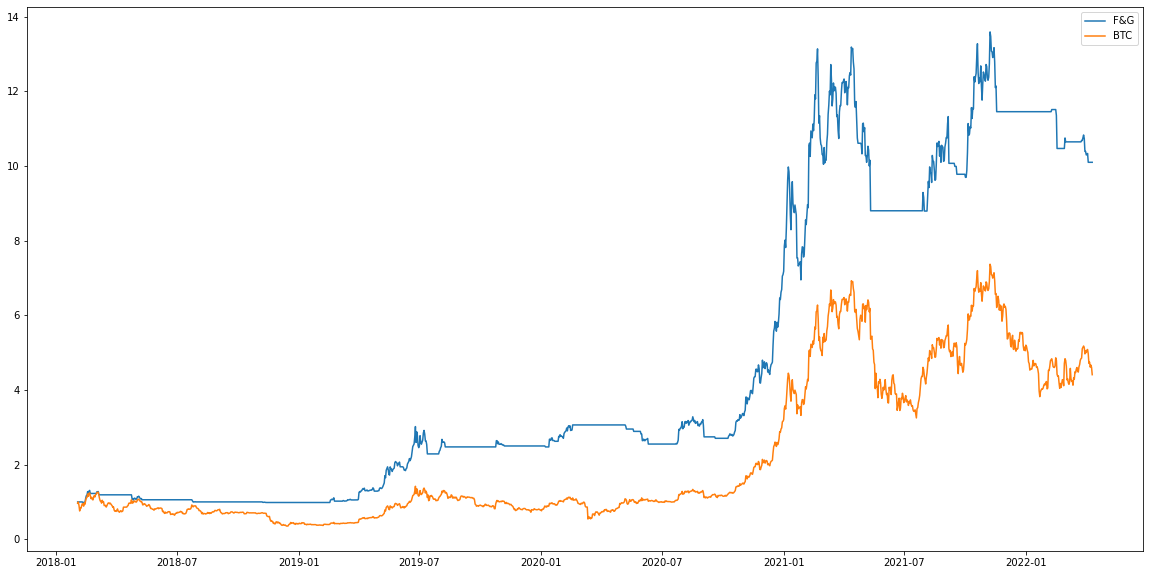

In [16]:
plt.figure(figsize=(20,10))
plt.plot((strategy + 1).cumprod(), label='F&G')
plt.plot((tog.change + 1).cumprod(), label='BTC')
plt.legend()